# <center>Visualization of USD-Euro Exchange Rates (1999-2023)</center>


# Euro-Dollar Exchange Rate Analysis

The dataset we'll be using contains daily exchange rates of the euro (€) against the US dollar ($), spanning from 1999 to 2023. The euro is the official currency in most countries of the European Union.

In this analysis, we aim to explore the fluctuations in the euro-dollar exchange rate over the years and understand the factors influencing these changes.

The [dataset](https://www.kaggle.com/datasets/lsind18/euro-exchange-daily-rates-19992020), compiled by [Daria Chemkaeva](https://www.kaggle.com/lsind18) and sourced from the European Central Bank via Kaggle, provides valuable information for conducting this analysis. It's worth noting that the dataset receives regular updates, with the version used in this analysis downloaded in March 2024.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import timedelta
from matplotlib.dates import MonthLocator, DateFormatter 

## Basic Dataset Exploration

In [2]:
exchange_rate = pd.read_csv('euro-daily-hist_1999_2022.csv')
df = exchange_rate.copy()
df.columns

Index(['Period\Unit:', '[Australian dollar ]', '[Bulgarian lev ]',
       '[Brazilian real ]', '[Canadian dollar ]', '[Swiss franc ]',
       '[Chinese yuan renminbi ]', '[Cypriot pound ]', '[Czech koruna ]',
       '[Danish krone ]', '[Estonian kroon ]', '[UK pound sterling ]',
       '[Greek drachma ]', '[Hong Kong dollar ]', '[Croatian kuna ]',
       '[Hungarian forint ]', '[Indonesian rupiah ]', '[Israeli shekel ]',
       '[Indian rupee ]', '[Iceland krona ]', '[Japanese yen ]',
       '[Korean won ]', '[Lithuanian litas ]', '[Latvian lats ]',
       '[Maltese lira ]', '[Mexican peso ]', '[Malaysian ringgit ]',
       '[Norwegian krone ]', '[New Zealand dollar ]', '[Philippine peso ]',
       '[Polish zloty ]', '[Romanian leu ]', '[Russian rouble ]',
       '[Swedish krona ]', '[Singapore dollar ]', '[Slovenian tolar ]',
       '[Slovak koruna ]', '[Thai baht ]', '[Turkish lira ]', '[US dollar ]',
       '[South African rand ]'],
      dtype='object')

In [3]:
df.columns = [col.strip("[]").strip().replace(' ','_') for col in df.columns]
df.head()

,Period\Unit:,Australian_dollar,Bulgarian_lev,Brazilian_real,Canadian_dollar,Swiss_franc,Chinese_yuan_renminbi,Cypriot_pound,Czech_koruna,Danish_krone,...,Romanian_leu,Russian_rouble,Swedish_krona,Singapore_dollar,Slovenian_tolar,Slovak_koruna,Thai_baht,Turkish_lira,US_dollar,South_African_rand
0,2023-12-15,1.6324,1.9558,5.4085,1.4653,0.9488,7.7812,NaN,24.477,7.4556,...,4.9710,NaN,11.2125,1.456,NaN,NaN,38.119,31.7965,1.0946,19.9801
1,2023-12-14,1.6288,1.9558,5.3349,1.4677,0.949,7.7866,NaN,24.408,7.4566,...,4.9712,NaN,11.18,1.4527,NaN,NaN,38.146,31.6673,1.0919,20.2693
2,2023-12-13,1.6452,1.9558,5.3609,1.4644,0.9452,7.7426,NaN,24.476,7.4566,...,4.9738,NaN,11.277,1.449,NaN,NaN,38.612,31.3399,1.0787,20.587
3,2023-12-12,1.6398,1.9558,5.3327,1.4656,0.9443,7.7447,NaN,24.42,7.4569,...,4.9732,NaN,11.2815,1.4479,NaN,NaN,38.543,31.3765,1.0804,20.4297
4,2023-12-11,1.642,1.9558,5.3169,1.4609,0.9478,7.7206,NaN,24.367,7.4563,...,4.9707,NaN,11.297,1.4454,NaN,NaN,38.402,31.1872,1.0757,20.5441


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6456 entries, 0 to 6455
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Period\Unit:           6456 non-null   object 
 1   Australian_dollar      6456 non-null   object 
 2   Bulgarian_lev          6054 non-null   object 
 3   Brazilian_real         6188 non-null   object 
 4   Canadian_dollar        6456 non-null   object 
 5   Swiss_franc            6456 non-null   object 
 6   Chinese_yuan_renminbi  6188 non-null   object 
 7   Cypriot_pound          2346 non-null   object 
 8   Czech_koruna           6456 non-null   object 
 9   Danish_krone           6456 non-null   object 
 10  Estonian_kroon         3130 non-null   object 
 11  UK_pound_sterling      6456 non-null   object 
 12  Greek_drachma          520 non-null    object 
 13  Hong_Kong_dollar       6456 non-null   object 
 14  Croatian_kuna          5941 non-null   object 
 15  Hung

In [5]:
df.isnull().sum()

Period\Unit:                0
Australian_dollar           0
Bulgarian_lev             402
Brazilian_real            268
Canadian_dollar             0
Swiss_franc                 0
Chinese_yuan_renminbi     268
Cypriot_pound            4110
Czech_koruna                0
Danish_krone                0
Estonian_kroon           3326
UK_pound_sterling           0
Greek_drachma            5936
Hong_Kong_dollar            0
Croatian_kuna             515
Hungarian_forint            0
Indonesian_rupiah           0
Israeli_shekel            268
Indian_rupee              268
Iceland_krona            2407
Japanese_yen                0
Korean_won                  0
Lithuanian_litas         2297
Latvian_lats             2552
Maltese_lira             4110
Mexican_peso                0
Malaysian_ringgit           0
Norwegian_krone             0
New_Zealand_dollar          0
Philippine_peso             0
Polish_zloty                0
Romanian_leu               62
Russian_rouble            462
Swedish_kr

## Data Cleaning

In [6]:
df.rename(columns={"Period\\Unit:":"Time"}, inplace=True)
df['Time'] = pd.to_datetime(df['Time'])
df.sort_values('Time', inplace=True)
df.reset_index(drop=True, inplace=True)

In [7]:
nonnull_col = df.columns[df.notnull().all()].drop("Time")
numeric_df = df[nonnull_col].apply(pd.to_numeric, errors='coerce')
numeric_df['Time']=df['Time']
df.loc[:,nonnull_col]= numeric_df
for col in nonnull_col:
    df[col] = df[col].astype(float)
df = df.dropna(subset=['US_dollar'])

### Finding the Most Suitable Rolling Window for Graph Analysis

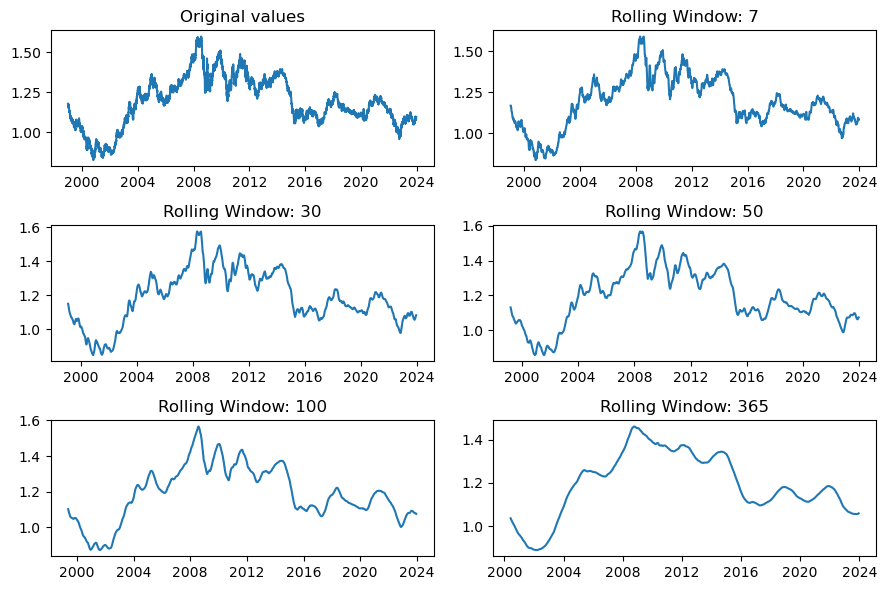

In [8]:
plt.figure(figsize=(9, 6))

plt.subplot(3, 2, 1)
plt.plot(df['Time'], df['US_dollar'])
plt.title('Original values')

rolling_means = [7, 30, 50, 100, 365]
for i, rolling_mean in enumerate(rolling_means, start=2):
    plt.subplot(3, 2, i)
    plt.plot(df['Time'], df['US_dollar'].rolling(rolling_mean).mean())
    plt.title('Rolling Window: ' + str(rolling_mean))

plt.tight_layout()
plt.show()


## Exploring Annual USD Exchange Rate Trends (2006-2009)

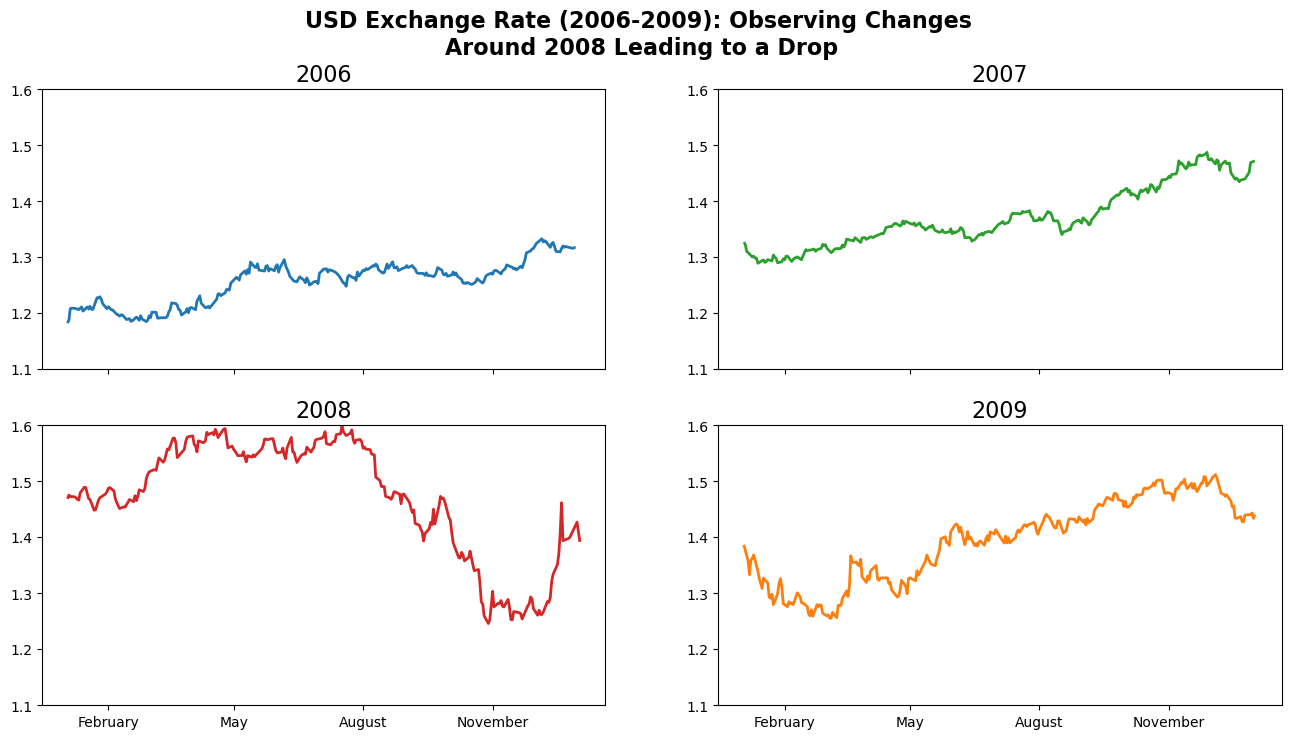

In [9]:
fig,ax = plt.subplots(2,2,figsize=(16,8),sharex=True)
colors = ['#1f77b4', '#2ca02c', '#d62728', '#ff7f0e']

for val,color in zip(enumerate(range(2006,2010)),colors):
    plt.style.use('Solarize_Light2')
    i,year = val
    row = i//2
    col = i%2
    ax[row,col].plot(df[df['Time'].dt.year==year]['Time'].dt.dayofyear, df[df['Time'].dt.year==year]['US_dollar'],label=str(year),color=color)
    ax[row, col].set_title(str(year))
    ax[row, col].set_ylim(1.1,1.6 )
    ax[row, col].grid(False)
ax = plt.gca()
ax.xaxis.set_major_locator(MonthLocator(interval=3))
ax.xaxis.set_major_formatter(DateFormatter("%B"))
fig.suptitle("USD Exchange Rate (2006-2009): Observing Changes \nAround 2008 Leading to a Drop", fontsize=16,weight='bold', ha='center')
plt.show()

# Visualizing Euro-Dollar Exchange Rate

### Trends in Euro-Dollar Exchange Rate During US Presidential Tenures:

In [10]:
# Defining the date ranges corresponding to each president's tenure
presidents_tenure = {
    'George W. Bush': (pd.to_datetime('2001-01-20'), pd.to_datetime('2009-01-20')),
    'Barack Obama': (pd.to_datetime('2009-01-20'), pd.to_datetime('2017-01-20')),
    'Donald Trump': (pd.to_datetime('2017-01-20'), pd.to_datetime('2021-01-20')),
    'Joe Biden': (pd.to_datetime('2021-01-20'), pd.to_datetime('2025-01-20'))
}

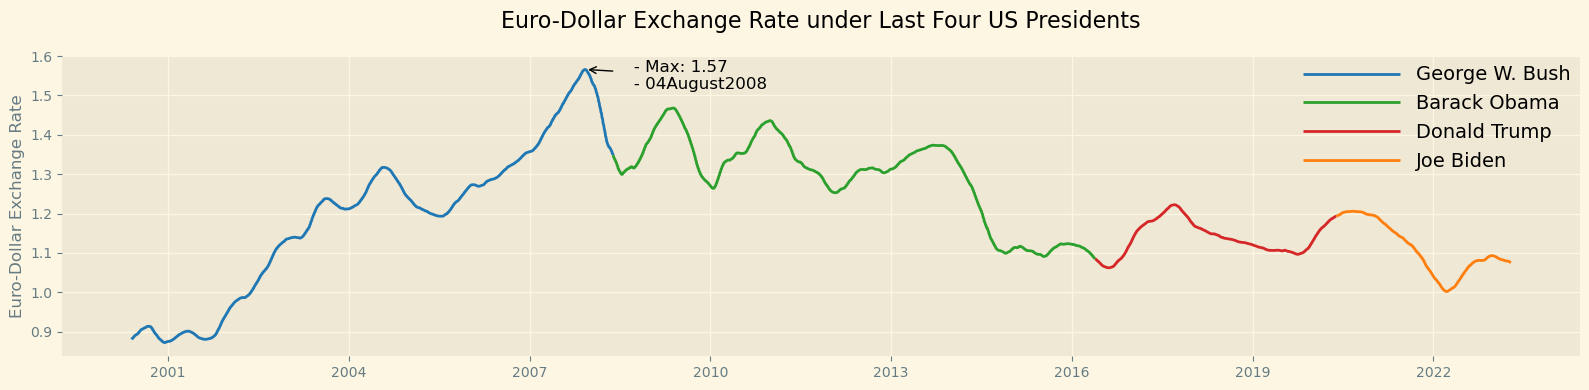

In [11]:
def plot_euro_dollar_exchange_rate():

    plt.style.use('Solarize_Light2')
    # Plotting
    plt.figure(figsize=(16,4))
    plt.subplot()
    df['rolling_mean_usd'] = df['US_dollar'].rolling(100).mean()
    colors = ['#1f77b4', '#2ca02c', '#d62728', '#ff7f0e']
    # Plotting exchange rate data for each president
    for president_info,color in zip(presidents_tenure.items(),colors):
        president, dates = president_info
        start_date, end_date = dates
        president_data = df[(df['Time'] >= start_date) & (df['Time'] <= end_date)]
        plt.plot(president_data['Time'], president_data['rolling_mean_usd'], label=president,color=color)

    # Finding maximum value and its corresponding time for annotation
    max_value = df['rolling_mean_usd'].max()
    max_time = df.loc[df['rolling_mean_usd'].idxmax(), 'Time']

    # Annotating the maximum value with date on the graph
    plt.annotate(f'   - Max: {max_value:.2f} \n   - {max_time.strftime("%d%B%Y")}', xy=(max_time, max_value), xytext=(max_time+timedelta(200), max_value-0.05),
                 arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12)

    # Setting x-axis as the name of the month after every 36 months
    ax = plt.gca()
    ax.xaxis.set_major_locator(MonthLocator(interval=36))
    ax.xaxis.set_major_formatter(DateFormatter("%Y"))

    # Hiding the spines
    for location in ['left', 'right', 'top', 'bottom']:
        ax.spines[location].set_visible(False)


    plt.ylabel('Euro-Dollar Exchange Rate')
    plt.title('Euro-Dollar Exchange Rate under Last Four US Presidents', pad=20)
    plt.legend(frameon=False, fontsize=14, handlelength=5,borderpad=0)
    plt.tight_layout()
    plt.show()
plot_euro_dollar_exchange_rate()

### Performance Analysis Across US Presidential Tenures 

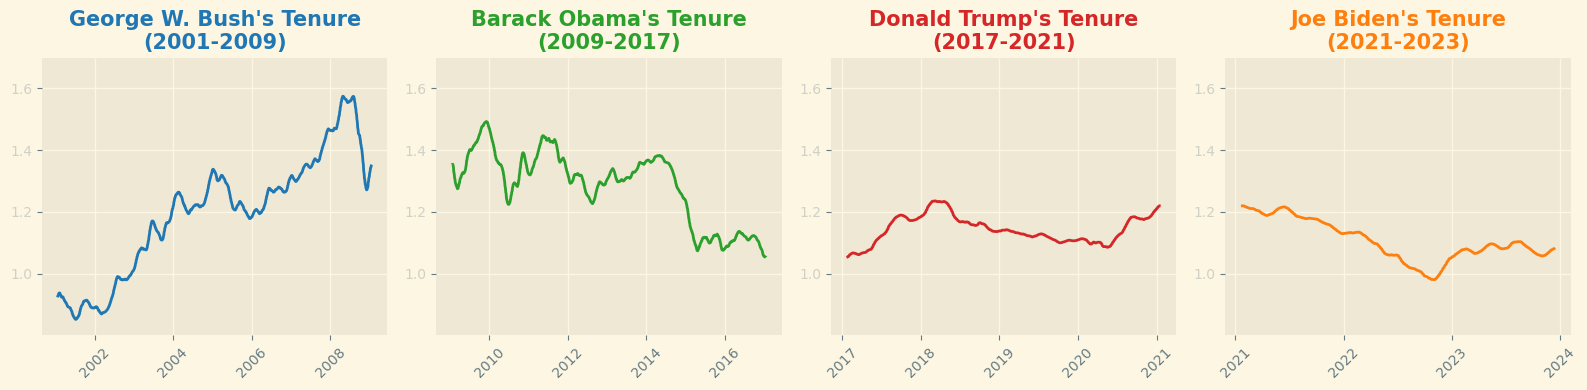

In [12]:
def plot_presidents_tenure_performance():
    plt.style.use('Solarize_Light2')

    fig, (ax1, ax2, ax3,ax4) = plt.subplots(nrows=1, ncols=4,
                                             figsize=(16,4))
    for ax in [ax1, ax2, ax3,ax4]:
        ax.set_ylim(0.8, 1.7)
        ax.set_yticks([1.0, 1.2, 1.4, 1.6])
        ax.set_yticklabels(['1.0', '1.2','1.4', '1.6'],
                       alpha=0.3)

        for location in ['left','right','top','bottom']:
            ax.spines[location].set_visible(False)

#     colors = ['#1f77b4', '#2ca02c', '#d62728', '#ff7f0e']
    df['rolling_30']=df['US_dollar'].rolling(30).mean()
    for president_info, ax, color in zip(presidents_tenure.items(), [ax1, ax2, ax3, ax4], colors):
        president, dates = president_info
        start_date, end_date = dates
        president_data = df[(df['Time'] >= start_date) & (df['Time'] <= end_date)]
        # Calculating the total number of years covered
        total_years = len(president_data['Time'].dt.year.unique())

        xticks = pd.date_range(start=start_date, end=end_date, freq='AS')
        # Setting xticks based on the total number of years covered
        if total_years <= 5:
            ax.xaxis.set_major_locator(mdates.YearLocator())
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
        else:
            ax.xaxis.set_major_locator(mdates.YearLocator(2))
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
        ax.tick_params(axis='x', rotation=45)
        ax.plot(president_data['Time'], president_data['rolling_30'], color=color)
        ax.set_title(f"{president}'s Tenure\n({min(president_data['Time']).year}-{max(president_data['Time']).year})", fontsize=15, color=color, weight='bold')    

    plt.tight_layout() 
    plt.show()
plot_presidents_tenure_performance()

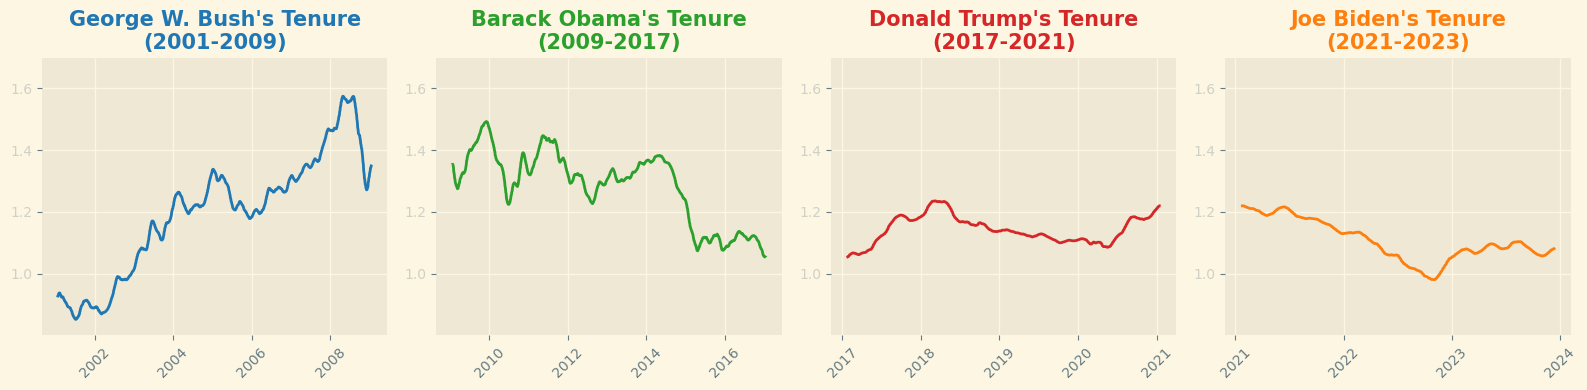

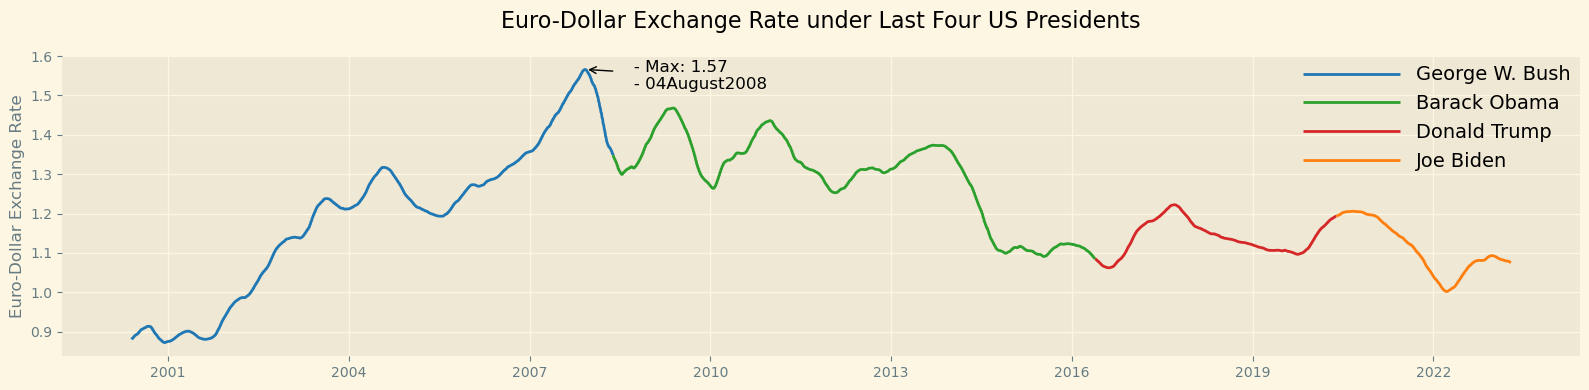

In [13]:
plot_presidents_tenure_performance()
plot_euro_dollar_exchange_rate()

# <center>Your Feedback is Appreciated</center>